# Integração de Python com Power BI

### 2 Formas de Fazer:

1. Usar o Python para fazer os tratamentos de bases de dados, criar colunas, etc. para importar para o Power BI depois -> biblioteca pandas -> exatamente como aprendemos no módulo de pandas

2. (O que vamos focar aqui). Usar scripts em Python diretamente dentro do Power BI


Obs: Você precisa do Power BI instalado no seu computador para isso funcionar. Caso não tenha ele instalado, na descrição tem o link ensinando a baixar e instalar gratuitamente.

### O que conseguimos fazer?

Basicamente, tudo o que temos feito no Python você consegue jogar para dentro do Power BI. Isso porque o Power BI tem um executor de scripts em Python, o que significa que ele roda nossos códigos lá dentro.

- Um dos maiores usos para Python no Power BI é a biblioteca do pandas, dado que ela trabalha com tabelas e o Power BI também.
- Além disso, as bibliotecas de visuais/gráficos também são muito úteis

### Como usar o Python no Power BI - 3 opções:

    1 - Como fonte de Dados
    2 - Para editar uma tabela no Editor de Consultas (Power Query)
    3 - Para criar um visual

### Antes de começar, configurações importantes

Arquivo -> Opções -> Scripts do Python:
- Verificar se o campo "Diretório base do Python" está onde você instalou o python no ambiente virtual
- Se não estiver (provavelmente não vai estar), ajeitar manualmente

É aconselhavel a criação de um ambiente virtual para não existir problemas de conflito de versões.Outra alternativa é a instalação através do proprio notebook


1-Abrir o prompt do Anaconda (modo Administrador)

2-rodar o comando: conda create -n pythonpowerbi python=3.6

3-ativar o ambiente virtual: conda activate pythonpowerbi

3-desativar o ambiente virtual: conda deactivate 

3-deletar o ambiente virtual: conda remove -n pythonpowerbi -all

3-verificando os ambientes virtuais instalados: conda info --envs

3-verificar a versão python instalada em um ambiente virtual: python --version  (fazer isso dentro do ambiente virtual) 

4-Instalar as bibliotecas requeridas para o ambiente criado 

4.1 pip install pandas  (ou conda install -n yourenvname package) Ex: conda install -n pythonpowerbi pandas

4.2 pip install matplotlib (ou conda install -n yourenvname package) Ex: conda install -n pythonpowerbi matplotlib

4.3 pip install seaborn (ou conda install -n yourenvname package) Ex: conda install -n pythonpowerbi seaborn


5-Instalar o Jupyter Notebook no ambiente criado 

5.1 Abrir o Anaconda Navigator 
5.2 Trocar o Kernel para o ambiente criado 
5.3 Instalar o icone do Jupyter Notebook 


6-No powerbi configurar para ele apontar para o novo env python criado

6.1 Arquivo-> Opções e Configurações -> Opções -> Scripts do Python -> definir 

o diretorio do env criado 
    C:\ProgramData\Anaconda3\envs\pythonpowerbi

7-Testar comando python para ver se funciona 

7.1 Opção: Obter dados -> Mais -> Script do Python -> colocar o script python e rodar para ver se funciona

import pandas as pd
vendas_df = pd.read_csv(r'C:\Users\gusta\Meu Drive\Colab Notebooks\DML\1.7-Dashboad de Analise de Vendas com Scripts Python no Power BI\datasets\Vendas.csv', sep=';')

### Pequeno teste

In [1]:
#Se estiver utilizando o Google Colaboratory 
#from google.colab import drive
#rive.mount('/content/drive')

In [2]:
import pandas as pd
vendas_df = pd.read_csv(r'C:\Users\gusta\Meu Drive\Colab Notebooks\DML\1.10-PBI-Dashboad de Analise de Vendas com Scripts Python no PowerBI\datasets/Vendas.csv', sep=';')
display(vendas_df)

#rodar no powerbi 
#import pandas as pd
#vendas_df = pd.read_csv(r'C:\Users\gusta\Meu Drive\Colab Notebooks\PBI\DataSets\Vendas.csv', sep=';')



,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


### Qual arquivo vamos importar?

- Vamos usar o mesmo exemplo que usamos da empresa Contoso no módulo de Análise de Dados

Temos 4 arquivos diferentes:
- Vendas
- Lojas
- Clientes
- Produtos

E vamos integrar eles em 1 arquivo único apenas com as informações relevantes. Depois, vamos importar essa base tratada para o Power BI

In [ ]:
#Se estiver utilizando o Google Colaboratory 
#from google.colab import drive
#rive.mount('/content/drive')

In [1]:
import pandas as pd
import os
#importando os arquivos

caminho_padrao = r'C:\Users\gusta\Meu Drive\Colab Notebooks\DML\1.10-PBI-Dashboad de Analise de Vendas com Scripts Python no PowerBI\datasets'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Vendas.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Produtos.csv'), sep=';')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Lojas.csv'), sep=';')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Clientes.csv'), sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Categoria']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})


In [2]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Acessório para Computador,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Telefone para Casa & Escritório,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Home Theater,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Acessório para Computador,Loja Contoso New York No.1,anne5@adventure-works.com


In [3]:
#filtrar o dataframe para selecionar apenas as vendas de 3 lojas: Austin (86), Europe Online (306), Hartford (172)
dataset = vendas_df 

dataset_filtered = dataset[dataset['ID Loja'].isin([86, 306, 172])]
dataset_filtered

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,Câmera Digital,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Filme DVD,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Acessório para Câmera,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,Câmera e Filmadora,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Câmera e Filmadora,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,Acessório para Computador,Loja Contoso Hartford,mpadfield9g@usnews.com


# Integração Parte 3 - Python para exibir Visuais (gráficos e relatórios no Dashboard)

Nesse caso, usamos apenas a parte de visuais do Power BI.

Como o Power BI não é muito bom para testar código, você pode sempre testar aqui no Python para saber se o código está certinho e depois jogar para lá.

Mas pode criar direto no Power BI também, caso queira

In [4]:
#Se estiver utilizando o Google Colaboratory 
#from google.colab import drive
#rive.mount('/content/drive')

In [5]:
import pandas as pd
import os
#importando os arquivos

caminho_padrao = r'C:\Users\gusta\Meu Drive\Colab Notebooks\DML\1.10-PBI-Dashboad de Analise de Vendas com Scripts Python no PowerBI\datasets'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Vendas.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Produtos.csv'), sep=';')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Lojas.csv'), sep=';')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Clientes.csv'), sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Categoria']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})



In [6]:
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Acessório para Computador,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Telefone para Casa & Escritório,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Home Theater,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Acessório para Computador,Loja Contoso New York No.1,anne5@adventure-works.com


In [7]:
#filtrar o dataframe para selecionar apenas as vendas de 3 lojas: Austin (86), Europe Online (306), Hartford (172)
dataset = vendas_df 

dataset_filtered = dataset[dataset['ID Loja'].isin([86, 306, 172])]
dataset_filtered


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,Câmera Digital,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Filme DVD,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Acessório para Câmera,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,Câmera e Filmadora,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Câmera e Filmadora,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,Acessório para Computador,Loja Contoso Hartford,mpadfield9g@usnews.com


In [8]:
dataset_filtered['Data da Venda'] = pd.to_datetime(dataset_filtered['Data da Venda'], format='%d/%m/%Y')
display(dataset_filtered)

C:\Users\gusta\AppData\Local\Temp\ipykernel_1700\875952771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['Data da Venda'] = pd.to_datetime(dataset_filtered['Data da Venda'], format='%d/%m/%Y')


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,2017-05-21,22/05/2017,1,86,981,1,21344,10,0,Câmera Digital,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Filme DVD,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,2017-06-08,11/06/2017,3,172,1287,1,559,5,0,Acessório para Câmera,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,2017-09-17,23/09/2017,6,172,1236,3,13331,6,0,Câmera e Filmadora,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,2017-10-18,19/10/2017,1,172,1243,1,3459,5,0,Câmera e Filmadora,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,2017-10-30,02/11/2017,3,172,937,1,341,10,0,Acessório para Computador,Loja Contoso Hartford,mpadfield9g@usnews.com


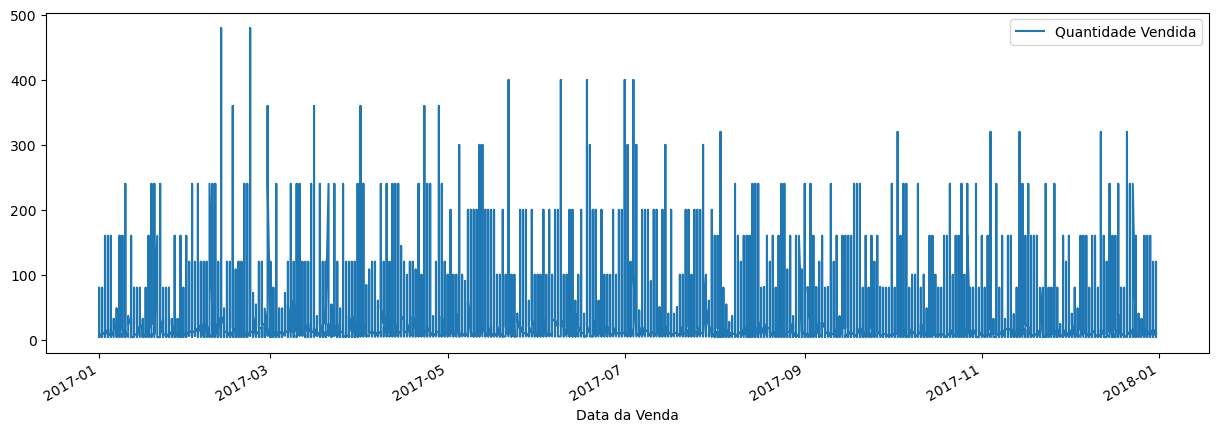

In [9]:
import matplotlib.pyplot as plt

dataset_filtered.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15, 5))
plt.show()

In [ ]:
#usando Seaborn para gerar gráfico de linhas para comparar a Venda das 3 lojas

import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_theme(style= "darkgrid")

sns.lineplot(x="Data da Venda", y = "Quantidade Vendida", hue="Nome da Loja", data=dataset_filtered)

plt.show()

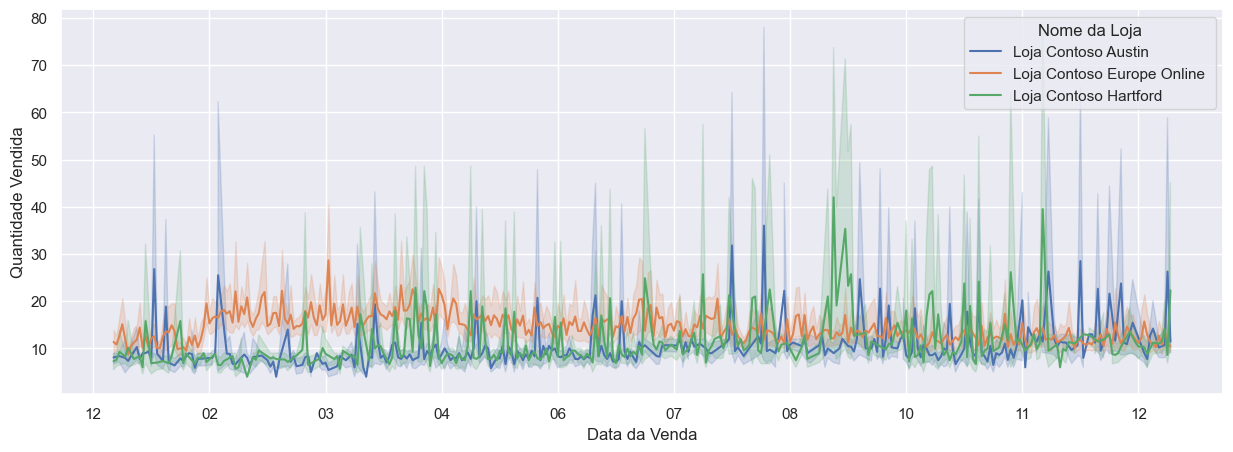

In [11]:
#grafico feito no PowerBI com formatações 

import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter 
import seaborn as sns 

sns.set_theme(style= "darkgrid")
#configurando o tamanho do grafico 
fig, ax = plt.subplots(figsize=(15,5))
#configurando o nr. de xticks no eixo x 
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#convertendo o formato de data para mes 
ax.xaxis.set_major_formatter(DateFormatter('%m'))
sns.lineplot(x="Data da Venda", y = "Quantidade Vendida", hue="Nome da Loja", data=dataset_filtered, ax=ax)

plt.show()